In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/y0uC4N/preprocessing/updated_type10.csv')

sample_fraction = 0.5
df.head()

,type,time,isCan0,priority,messageID,isService,serviceNODEID,byteSize,data[0],data[1],data[2],data[3],data[4],data[5],data[6],data[7],7byteNullCnt,8byteNullCnt
0,Normal,0.000000,1,5,1030,0,1,8,166,53,0,0,0,0,0,148,0,5
1,Normal,0.000139,1,5,1030,0,1,7,0,0,0,0,0,0,116,-1,6,0
2,Normal,0.004482,1,5,1030,0,1,8,166,53,0,0,0,0,0,149,0,5
3,Normal,0.004641,1,5,1030,0,1,7,0,0,0,0,0,0,117,-1,6,0
4,Normal,0.009330,1,5,1030,0,1,8,166,53,0,0,0,0,0,150,0,5


In [4]:
df.isnull().sum()

type             0
time             0
isCan0           0
priority         0
messageID        0
isService        0
serviceNODEID    0
byteSize         0
data[0]          0
data[1]          0
data[2]          0
data[3]          0
data[4]          0
data[5]          0
data[6]          0
data[7]          0
7byteNullCnt     0
8byteNullCnt     0
dtype: int64

In [5]:
x=df

sample_fraction = 0.5

df= df.sample(frac=sample_fraction, random_state=42)

x = df.drop('type',axis=1)
y = df['type']
x=x.drop('isCan0',axis=1)
x=x.drop('isService',axis=1)
corr=x.corr()
corr.style.background_gradient(cmap='coolwarm')


,time,priority,messageID,serviceNODEID,byteSize,data[0],data[1],data[2],data[3],data[4],data[5],data[6],data[7],7byteNullCnt,8byteNullCnt
time,1.000000,-0.025365,-0.009941,0.019939,0.008715,0.065941,0.270926,0.215441,0.215398,0.177849,0.159103,0.092622,-0.000211,-0.235047,-0.270373
priority,-0.025365,1.000000,0.115709,0.792451,-0.362175,-0.031640,0.001566,-0.034800,0.089684,-0.082036,0.013840,-0.031703,-0.010419,-0.184836,0.153037
messageID,-0.009941,0.115709,1.000000,-0.023183,-0.271349,0.070402,0.064453,-0.036560,-0.049696,-0.032691,-0.021144,-0.053744,-0.057322,-0.025312,-0.037337
serviceNODEID,0.019939,0.792451,-0.023183,1.000000,-0.316145,-0.072937,0.008325,-0.072501,0.004384,-0.131427,-0.019450,-0.014636,-0.002839,-0.184242,0.191160
byteSize,0.008715,-0.362175,-0.271349,-0.316145,1.000000,0.357918,0.058192,0.201473,0.212731,0.331346,0.123835,0.011517,0.650453,-0.240847,0.339856
data[0],0.065941,-0.031640,0.070402,-0.072937,0.357918,1.000000,0.163711,0.292299,0.141694,0.302247,0.171524,-0.161780,0.489620,-0.536091,0.354648
data[1],0.270926,0.001566,0.064453,0.008325,0.058192,0.163711,1.000000,0.197142,0.272820,0.206376,0.134085,0.078592,0.065692,-0.343854,-0.172650
data[2],0.215441,-0.034800,-0.036560,-0.072501,0.201473,0.292299,0.197142,1.000000,0.429808,0.606266,0.362023,-0.108562,0.389274,-0.485137,-0.193224
data[3],0.215398,0.089684,-0.049696,0.004384,0.212731,0.141694,0.272820,0.429808,1.000000,0.475764,0.432983,-0.003058,0.063025,-0.384430,-0.344930
data[4],0.177849,-0.082036,-0.032691,-0.131427,0.331346,0.302247,0.206376,0.606266,0.475764,1.000000,0.399476,-0.074046,0.400860,-0.455744,-0.178688


In [6]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier



clf = SVC(kernel='linear',probability=True)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
dt = DecisionTreeClassifier(max_depth = 5 , min_samples_split=2,)
#stratifiedkfold

In [8]:
kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

from sklearn.decomposition import PCA  # PCA 추가
import time
# VotingClassifier 생성
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


In [9]:
ensemble = VotingClassifier(estimators=[('svm', clf), ('rf', rf), ('dt', dt)], voting='soft')

print(clf)
print(dt)
print(rf)
print(ensemble)

SVC(kernel='linear', probability=True)
DecisionTreeClassifier(max_depth=5)
RandomForestClassifier(random_state=42)
VotingClassifier(estimators=[('svm', SVC(kernel='linear', probability=True)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('dt', DecisionTreeClassifier(max_depth=5))],
                 voting='soft')


Accuracy of dt: 0.900503413956718
Accuracy of rf: 0.9835377849785905
Accuracy of clf: 0.9542587663464877
Accuracy of ensemble: 0.9663522740423562
Accuracy of dt: 0.9006162659491364
Accuracy of rf: 0.9836530393773688
Accuracy of clf: 0.9543153082776379
Accuracy of ensemble: 0.9661777044816712
Accuracy of dt: 0.8996614877180801
Accuracy of rf: 0.9839423661140526
Accuracy of clf: 0.9525504151838672
Accuracy of ensemble: 0.964615340103579
['Normal' 'Fuzzy' 'flooding' 'Replay attack']


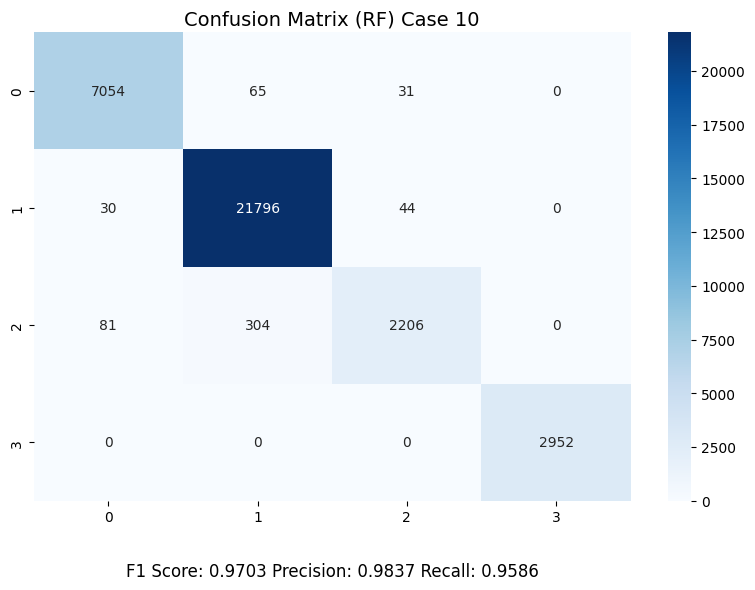

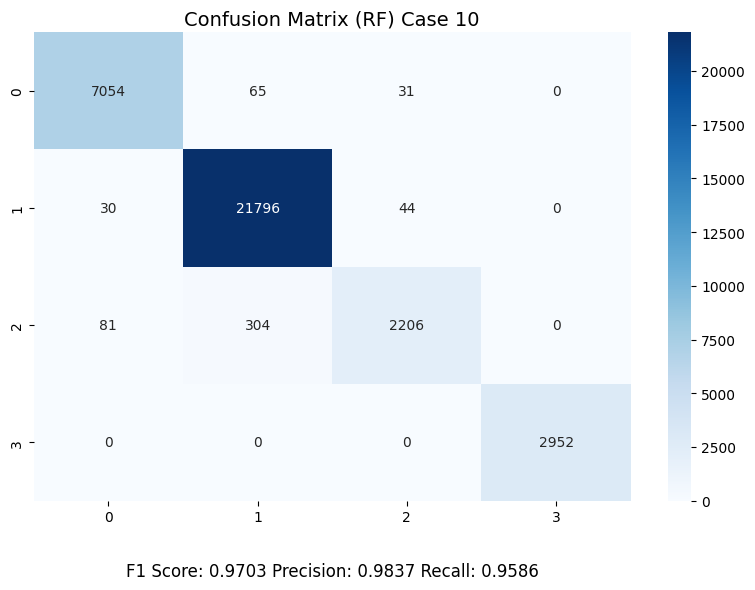

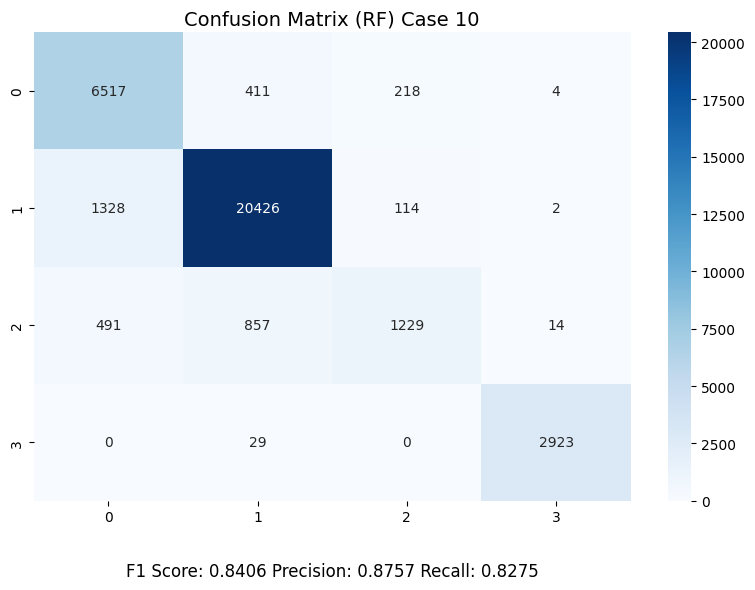

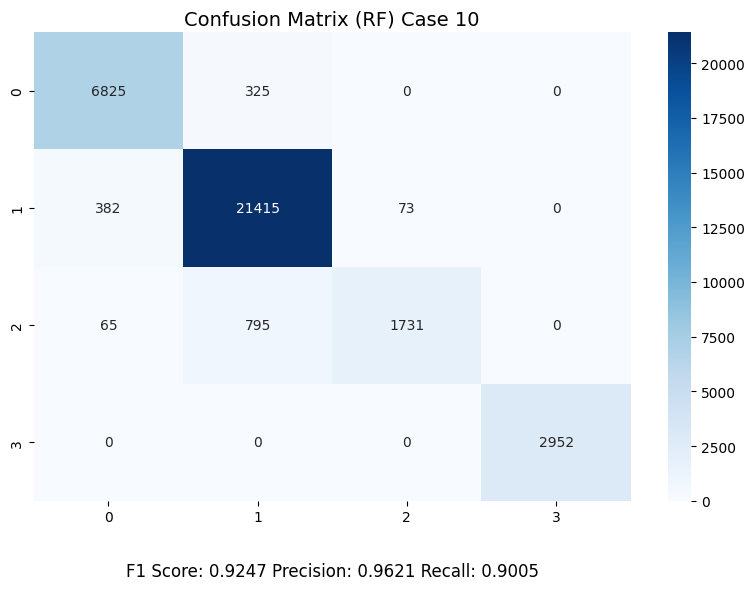

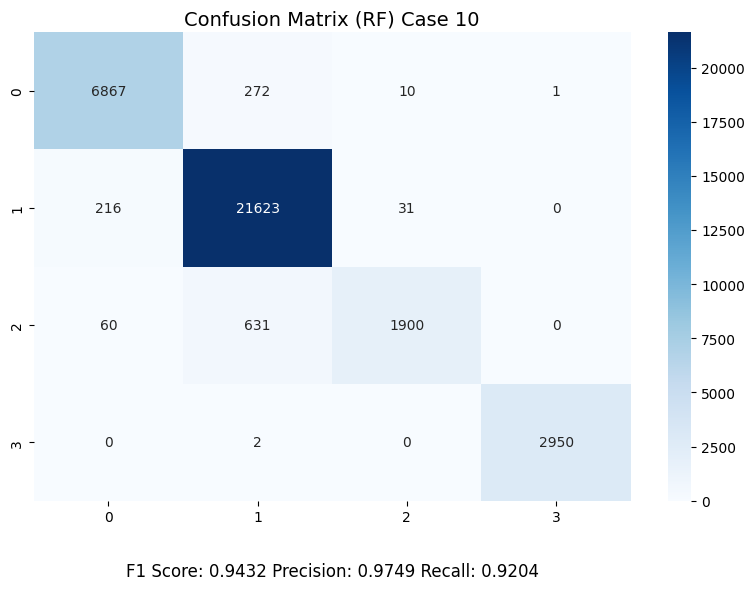

In [10]:
for train_index, test_index in kf.split(x, y):
        # 학습 데이터와 테스트 데이터 분할
  x_train, x_test = x.iloc[train_index], x.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # 데이터 표준화
  scaler = StandardScaler()
  x_train = scaler.fit_transform(x_train)
  x_test = scaler.transform(x_test)

        # PCA 적용
  pca = PCA(n_components=0.95)
  x_train_pca = pca.fit_transform(x_train)
  x_test_pca = pca.transform(x_test)

        #학습
  dt.fit(x_train_pca,y_train)
  rf.fit(x_train_pca,y_train)
  clf.fit(x_train_pca,y_train)
  ensemble.fit(x_train_pca,y_train)

        #예측
  y_pred_dt = dt.predict(x_test_pca)
  y_pred_rf = rf.predict(x_test_pca)
  y_pred_clf=clf.predict(x_test_pca)
  y_pred_ensemble=ensemble.predict(x_test_pca)
        #설명
  from sklearn.metrics import accuracy_score
  accuracy_dt = accuracy_score(y_test, y_pred_dt)
  accuracy_rf = accuracy_score(y_test, y_pred_rf)
  accuracy_clf = accuracy_score(y_test, y_pred_clf)
  accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
  print(f"Accuracy of dt: {accuracy_dt}")
  print(f"Accuracy of rf: {accuracy_rf}")
  print(f"Accuracy of clf: {accuracy_clf}")
  print(f"Accuracy of ensemble: {accuracy_ensemble}")
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test and y_pred_rf are defined
print(y_test.unique())
# Compute confusion matrix
cm1 = confusion_matrix(y_test, y_pred_rf)

# Compute metrics
f1_1 = f1_score(y_test, y_pred_rf, average='macro')
precision_1 = precision_score(y_test, y_pred_rf, average='macro')
recall_1 = recall_score(y_test, y_pred_rf, average='macro')

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.set_title('Confusion Matrix (RF) Case 10', fontsize=14)
ax.set_xlabel('Predicted Label', fontsize=12)
ax.set_ylabel('True Label', fontsize=12)
ax.text(0.5, -0.15, f'F1 Score: {f1_1:.4f} Precision: {precision_1:.4f} Recall: {recall_1:.4f}',
        horizontalalignment='center', verticalalignment='center', transform=ax.transAxes,
        fontsize=12)

# Heatmap
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues", ax=ax)

# Adjust subplot spacing
plt.tight_layout()
plt.show()

cm1 = confusion_matrix(y_test, y_pred_rf)

# Compute metrics
f1_1 = f1_score(y_test, y_pred_rf, average='macro')
precision_1 = precision_score(y_test, y_pred_rf, average='macro')
recall_1 = recall_score(y_test, y_pred_rf, average='macro')

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.set_title('Confusion Matrix (RF) Case 10', fontsize=14)
ax.set_xlabel('Predicted Label', fontsize=12)
ax.set_ylabel('True Label', fontsize=12)
ax.text(0.5, -0.15, f'F1 Score: {f1_1:.4f} Precision: {precision_1:.4f} Recall: {recall_1:.4f}',
        horizontalalignment='center', verticalalignment='center', transform=ax.transAxes,
        fontsize=12)

# Heatmap
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues", ax=ax)

# Adjust subplot spacing
plt.tight_layout()
plt.show()

cm1 = confusion_matrix(y_test, y_pred_dt)

# Compute metrics
f1_1 = f1_score(y_test, y_pred_dt, average='macro')
precision_1 = precision_score(y_test, y_pred_dt, average='macro')
recall_1 = recall_score(y_test, y_pred_dt, average='macro')

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.set_title('Confusion Matrix (RF) Case 10', fontsize=14)
ax.set_xlabel('Predicted Label', fontsize=12)
ax.set_ylabel('True Label', fontsize=12)
ax.text(0.5, -0.15, f'F1 Score: {f1_1:.4f} Precision: {precision_1:.4f} Recall: {recall_1:.4f}',
        horizontalalignment='center', verticalalignment='center', transform=ax.transAxes,
        fontsize=12)

# Heatmap
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues", ax=ax)

# Adjust subplot spacing
plt.tight_layout()
plt.show()

cm1 = confusion_matrix(y_test, y_pred_clf)

# Compute metrics
f1_1 = f1_score(y_test, y_pred_clf, average='macro')
precision_1 = precision_score(y_test, y_pred_clf, average='macro')
recall_1 = recall_score(y_test, y_pred_clf, average='macro')

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.set_title('Confusion Matrix (RF) Case 10', fontsize=14)
ax.set_xlabel('Predicted Label', fontsize=12)
ax.set_ylabel('True Label', fontsize=12)
ax.text(0.5, -0.15, f'F1 Score: {f1_1:.4f} Precision: {precision_1:.4f} Recall: {recall_1:.4f}',
        horizontalalignment='center', verticalalignment='center', transform=ax.transAxes,
        fontsize=12)

# Heatmap
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues", ax=ax)

# Adjust subplot spacing
plt.tight_layout()
plt.show()

cm1 = confusion_matrix(y_test, y_pred_ensemble)

# Compute metrics
f1_1 = f1_score(y_test, y_pred_ensemble, average='macro')
precision_1 = precision_score(y_test, y_pred_ensemble, average='macro')
recall_1 = recall_score(y_test, y_pred_ensemble, average='macro')

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.set_title('Confusion Matrix (RF) Case 10', fontsize=14)
ax.set_xlabel('Predicted Label', fontsize=12)
ax.set_ylabel('True Label', fontsize=12)
ax.text(0.5, -0.15, f'F1 Score: {f1_1:.4f} Precision: {precision_1:.4f} Recall: {recall_1:.4f}',
        horizontalalignment='center', verticalalignment='center', transform=ax.transAxes,
        fontsize=12)

# Heatmap
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues", ax=ax)

# Adjust subplot spacing
plt.tight_layout()
plt.show()


<div class="markdown-google-sans">
  <h1>Colab 시작 페이지</h1>
</div>

<div class="markdown-google-sans">
  <h2>&#40;신규&#41; Gemini API를 사용해 보세요</h2>
  <ul>
  <li><a href="https://makersuite.google.com/app/apikey">Generate a Gemini API key</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Talk_to_Gemini_with_Google%27s_Speech_to_Text_API.ipynb?utm_medium=link&utm_campaign=gemini">Talk to Gemini with the Speech-to-Text API</a></li>
  <li><a href="https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/tutorials/quickstart_colab.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API: Quickstart with Python</a></li>
  <li><a href="https://colab.research.google.com/notebooks/snippets/gemini.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API code sample</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Learning_with_Gemini_and_ChatGPT.ipynb?utm_medium=link&utm_campaign=gemini">Compare Gemini with ChatGPT</a></li>  
  <li><a href="https://colab.google/notebooks/?utm_medium=link&utm_campaign=gemini">More notebooks</a></li>
  </ul>
</div>


Colab에 이미 익숙하다면 이 동영상을 통해 양방향 테이블, 코드 실행 기록 보기, 명령어 팔레트에 관해 알아보세요.

<center>
  <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y" target="_blank">
  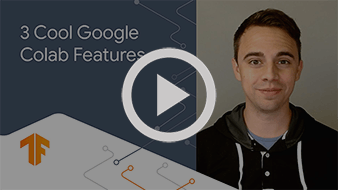
  </a>
</center>

<div class="markdown-google-sans">
  <h2>Colab이란?</h2>
</div>

Colaboratory&#40;줄여서 'Colab'이라고 함&#41;을 통해 브라우저 내에서 Python 스크립트를 작성하고 실행할 수 있습니다.
- 구성이 필요하지 않음
- 무료로 GPU 사용
- 간편한 공유

<strong>학생</strong>이든, <strong>데이터 과학자</strong>든, <strong>AI 연구원</strong>이든 Colab으로 업무를 더욱 간편하게 처리할 수 있습니다. <a href="https://www.youtube.com/watch?v=inN8seMm7UI">Colab 소개 영상</a>에서 자세한 내용을 확인하거나 아래에서 시작해 보세요.

<div class="markdown-google-sans">

## <strong>시작하기</strong>
</div>

지금 읽고 계신 문서는 정적 웹페이지가 아니라 코드를 작성하고 실행할 수 있는 대화형 환경인 <strong>Colab 메모장</strong>입니다.

예를 들어 다음은 값을 계산하여 변수로 저장하고 결과를 출력하는 간단한 Python 스크립트가 포함된 <strong>코드 셀</strong>입니다.

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

위 셀의 코드를 실행하려면 셀을 클릭하여 선택한 후 코드 왼쪽의 실행 버튼을 누르거나 단축키 'Command/Ctrl+Enter'를 사용하세요. 셀을 클릭하면 코드 수정을 바로 시작할 수 있습니다.

특정 셀에서 정의한 변수를 나중에 다른 셀에서 사용할 수 있습니다.

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Colab 메모장을 사용하면 <strong>실행 코드</strong>와 <strong>서식 있는 텍스트</strong>를 <strong>이미지</strong>, <strong>HTML</strong>, <strong>LaTeX</strong> 등과 함께 하나의 문서로 통합할 수 있습니다. Colab 메모장을 만들면 Google Drive 계정에 저장됩니다. Colab 메모장을 간편하게 공유하여 동료나 친구들이 댓글을 달거나 수정하도록 할 수 있습니다. 자세히 알아보려면 <a href="/notebooks/basic_features_overview.ipynb">Colab 개요</a>를 참조하세요. 새 Colab 메모장을 만들려면 위의 파일 메뉴를 사용하거나 다음 링크로 이동하세요. <a href="http://colab.research.google.com#create=true">새 Colab 메모장 만들기</a>

Colab 메모장은 Colab에서 호스팅하는 Jupyter 메모장입니다. Jupyter 프로젝트에 관해 자세히 알아보려면 <a href="https://www.jupyter.org">jupyter.org</a>를 참조하세요.

<div class="markdown-google-sans">

## 데이터 과학
</div>

Colab을 통해 인기 있는 Python 라이브러리를 최대한 활용하여 데이터를 분석하고 시각화할 수 있습니다. 아래 코드 셀에서는 <strong>Numpy</strong>를 사용하여 임의의 데이터를 생성하고 <strong>매트플롯립</strong>으로 이를 시각화합니다. 셀을 클릭하면 코드 수정을 바로 시작할 수 있습니다.

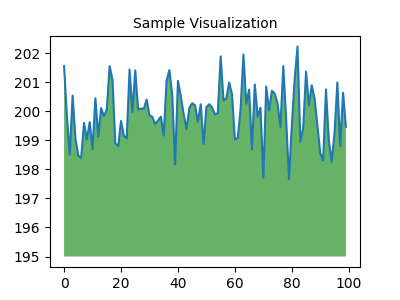

In [ ]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

Google Drive 계정에서 스프레드시트를 비롯한 데이터를 Colab 메모장으로 가져오거나 GitHub 등의 여러 다른 소스에서 데이터를 가져올 수 있습니다. Colab을 데이터 과학에 활용하는 방법과 데이터 가져오기에 관해 자세히 알아보려면 <a href="#working-with-data">데이터 사용하기</a> 아래 링크를 참조하세요.

<div class="markdown-google-sans">

## 머신러닝
</div>

Colab을 사용하면 <a href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb">코드 몇 줄</a>만으로 이미지 데이터세트를 가져오고, 이 데이터세트로 이미지 분류기를 학습시키며, 모델을 평가할 수 있습니다. Colab 메모장은 Google 클라우드 서버에서 코드를 실행하므로 사용 중인 컴퓨터의 성능과 관계없이 <a href="#using-accelerated-hardware">GPU 및 TPU</a>를 포함한 Google 하드웨어의 성능을 활용할 수 있습니다. 브라우저만 있으면 사용 가능합니다.

Colab은 다음과 같은 분야의 머신러닝 커뮤니티에서 널리 쓰이고 있습니다.
- TensorFlow 시작하기
- 신경망 개발 및 학습시키기
- TPU로 실험하기
- AI 연구 보급하기
- 튜토리얼 만들기

머신러닝 적용 사례를 보여 주는 Colab 메모장 샘플을 확인하려면 아래 <a href="#machine-learning-examples">머신러닝 예시</a>를 참조하세요.

<div class="markdown-google-sans">

## 추가 리소스

### Colab에서 메모장 사용하기

</div>

- [Colaboratory 개요](/notebooks/basic_features_overview.ipynb)
- [Markdown 가이드](/notebooks/markdown_guide.ipynb)
- [라이브러리 가져오기 및 종속 항목 설치하기](/notebooks/snippets/importing_libraries.ipynb)
- [GitHub에서 노트 저장 및 로드하기](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [대화형 양식](/notebooks/forms.ipynb)
- [대화형 위젯](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### 데이터로 작업하기
</div>

- [데이터 로드: 드라이브, 스프레드시트, Google Cloud Storage](/notebooks/io.ipynb)
- [차트: 데이터 시각화하기](/notebooks/charts.ipynb)
- [BigQuery 시작하기](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### 머신러닝 단기집중과정

<div>

다음은 Google 온라인 머신러닝 과정에서 가져온 일부 메모장입니다. <a href="https://developers.google.com/machine-learning/crash-course/">전체 과정 웹사이트</a>에서 자세한 내용을 확인하세요.
- [Pandas DataFrame 소개](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [합성 데이터를 사용하는 tf.keras 선형 회귀](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### 가속 하드웨어 사용하기
</div>

- [GPU를 사용한 TensorFlow](/notebooks/gpu.ipynb)
- [TPU를 사용한 TensorFlow](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### 추천 예시

</div>

- <a href="https://colab.research.google.com/github/NVIDIA/NeMo/blob/stable/tutorials/VoiceSwapSample.ipynb">NeMo Voice Swap</a>: Nvidia의 NeMo 대화형 AI 툴킷을 사용하여 오디오 파일의 음성을 컴퓨터에서 생성된 음성으로 변환하세요.

- <a href="https://tensorflow.org/hub/tutorials/tf2_image_retraining">이미지 분류기 재훈련</a>: 사전에 훈련된 이미지 분류기를 기반으로 꽃을 분류하기 위한 Keras 모델을 구축합니다.
- <a href="https://tensorflow.org/hub/tutorials/tf2_text_classification">텍스트 분류</a>: IMDB 영화 리뷰를 <em>긍정적인 리뷰</em> 또는 <em>부정적인 리뷰</em>로 분류합니다.
- <a href="https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization">스타일 트랜스퍼</a>: 딥 러닝을 사용하여 이미지 간에 스타일을 전이시킵니다.
- <a href="https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa">Multilingual Universal Sentence Encoder Q&amp;A</a>: 머신러닝 모델을 사용하여 SQuAD 데이터 세트의 질문에 답변합니다.
- <a href="https://tensorflow.org/hub/tutorials/tweening_conv3d">동영상 보간 유형</a>: 동영상에서 첫 프레임과 마지막 프레임 사이에 발생한 내용을 예측합니다.
